**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Import Data**

In [32]:
df = pd.read_excel('/content/Folds5x2_pp.xlsx')


In [33]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [34]:
x = df.drop(['PE'],axis=1).values


In [35]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [36]:
y = df['PE']

In [37]:
print(y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


**Split training and testing data set**

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=0)

**Training The Model on Training  Set**

In [39]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

**Predict The Test set Result**

In [40]:
y_pred = ml.predict(x_test)
print(y_pred)

[431.39746929 458.61306823 462.8132933  ... 430.24576539 464.47083536
 444.08498274]


In [41]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.36527472])

**Evaluat The Model**

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9310173107097915

**Plot The Result**

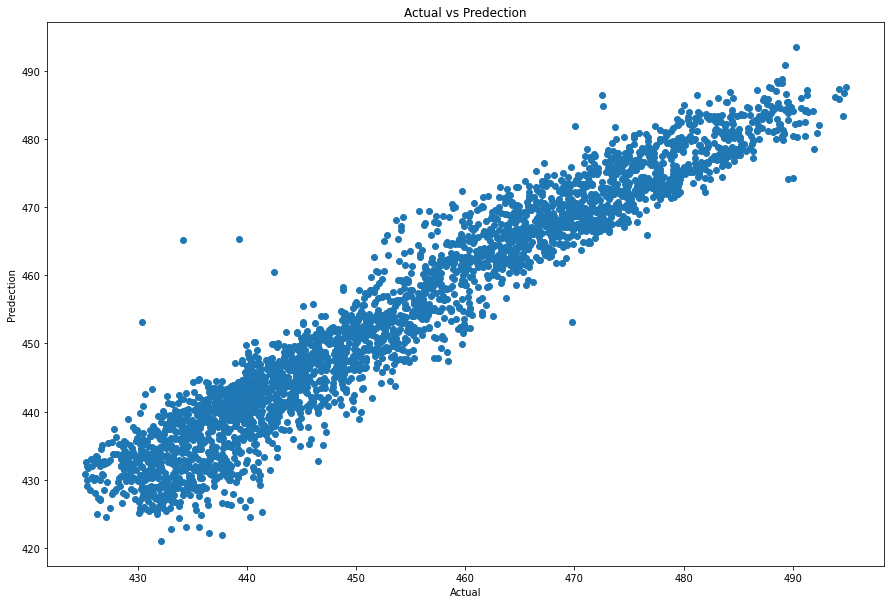

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predection')
plt.title('Actual vs Predection')
plt.show()

**Predict Values**

In [46]:
from pandas.core.groupby.grouper import DataFrame
predict_y_df = DataFrame({'Acutal values':y_test,'Predict Values' : y_pred,'Difference':y_test-y_pred})
predict_y_df[0:20]

,Acutal values,Predict Values,Difference
4834,431.23,431.397469,-0.167469
1768,460.01,458.613068,1.396932
2819,461.14,462.813293,-1.673293
7779,445.90,448.618875,-2.718875
7065,451.29,457.886495,-6.596495
9482,432.68,429.695875,2.984125
9,477.50,473.039180,4.460820
4986,459.68,456.548523,3.131477
6168,477.50,474.360287,3.139713
3664,444.99,446.406480,-1.416480
